In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [3]:
# for subdomain enrich
df_domain_geno= pd.read_excel("log2fc_domains_Geno.xlsx",index_col=0)

In [4]:
df_domain_geno_plot = df_domain_geno.pivot_table(columns="geno",index="area",values="avg_log2FC",aggfunc="mean").fillna(0)
df_domain_geno_pvalue = df_domain_geno.pivot_table(columns="geno",index="area",values="p_val_adj",aggfunc="mean").fillna(1)

In [5]:
domain_index = ["PAGpl","PAGcl","PAGpm"]
domain_geno = ['Pdyn','Tac1','Pomc','Oxt','Tac2','Orexin','Penk','Nts','Agrp','Sst','Adcyap1']


In [6]:
df_domain_geno_plot = df_domain_geno_plot.loc[domain_index,domain_geno]
df_domain_geno_pvalue = df_domain_geno_pvalue.loc[domain_index,domain_geno]

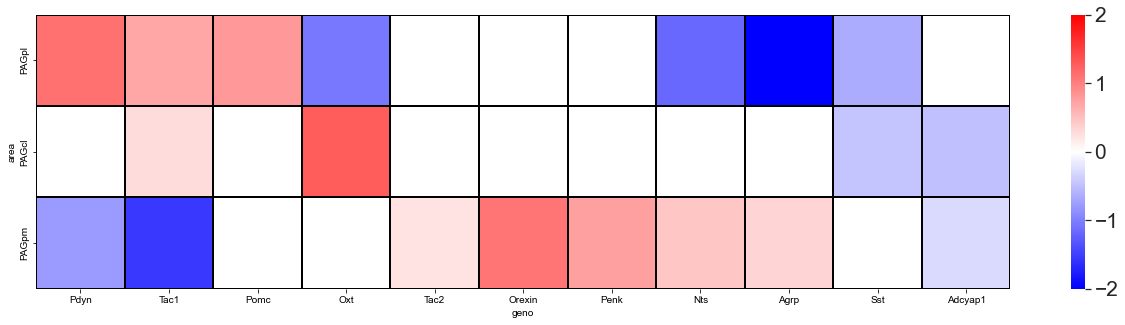

In [7]:
fig, ax = plt.subplots(figsize = (18,5))
sns.set(font_scale=1.9)
sns.heatmap(data = df_domain_geno_plot,cmap="bwr",vmin=-2,
                 vmax=2,linewidths=2, linecolor='black',annot=False,fmt="g",
                  mask = df_domain_geno_pvalue>0.05
                 )
plt.tight_layout()

plt.savefig("heatmap_for_subdomains.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_subdomains.jpg",dpi =600,format="jpg")